## *Classification of Bank Deposits: A Decision Tree Model for Yes/No Prediction*

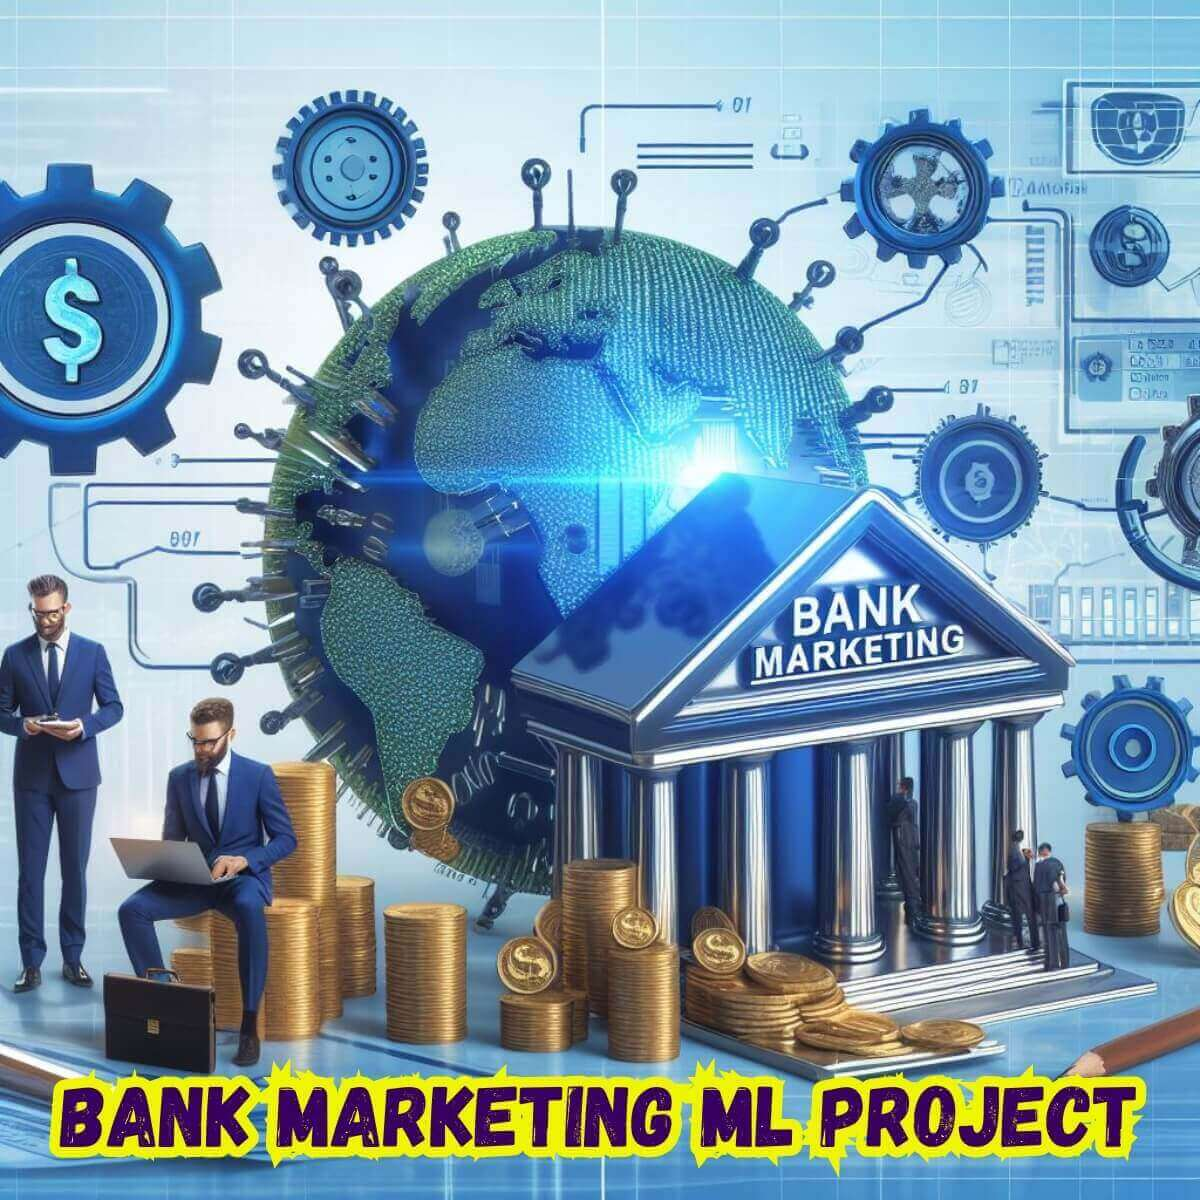

In [534]:
from IPython.display import Image

# Display the image with specified width and height
Image(r"C:\Users\Admin\Desktop\download.jpeg", width=1000, height=300)

#### 📊 *Dataset Overview*

---

### *Introduction to the Dataset*

*This dataset focuses on **direct marketing campaigns** conducted by a **Portuguese banking institution**. The bank’s goal was to promote its **term deposit product** through phone calls to existing customers. A **term deposit** (or fixed deposit) is a savings account where customers lock in a set amount of money for a fixed period, earning higher interest rates than regular accounts. The money can't be withdrawn early without incurring penalties, making it ideal for secure, higher returns. This product is particularly beneficial for customers seeking stable, long-term savings.*

### *Data Description and Classification Goal*

*The dataset contains **demographic** (age, job, marital status) and **behavioral** (previous interactions, loan status, contact duration) information of customers contacted during marketing campaigns. The **classification goal** is to predict whether a customer will **subscribe to a term deposit** (i.e., "yes" or "no") based on these features.*

*The dataset is suitable for **machine learning classification tasks**, containing a mix of **categorical** and **numerical** features to identify patterns in customer behavior and preferences.*

### *Dataset Details*

- *Total Records*: *The dataset consists of **11,163 rows** and **21 columns**, where each row represents a customer, and each column contains features about the customer and their interactions with the bank.*
- *Features*: *The columns include demographic and behavioral attributes, as well as the outcome (`y`), which indicates whether the customer subscribed to a term deposit.*

### *Project Scope*

*For this project, a subset of the dataset will be used to **build a predictive model** using a **Decision Tree classifier**. The sample size will be selected for efficient computation and accurate predictions, while ensuring a representative selection of the full dataset.*

---

### *Aim of the Project*

---

*The primary goal of this project is to build a **predictive model** that can accurately determine whether a customer will subscribe to a term deposit, based on their demographic and behavioral characteristics. By analyzing these customer features, the project aims to **optimize the bank’s marketing efforts** and improve conversion rates.*

*A **Decision Tree Classifier** will be used to create the predictive model. This classifier will identify the most significant factors that influence a customer’s decision to subscribe, allowing the bank to better tailor its marketing strategies.*

*The project will apply this model to a *customer data* to assess the effectiveness of using customer characteristics to predict subscription likelihood. The findings will help improve marketing efficiency and guide decision-making for future campaigns.*

---

## *A Decision Tree Model classifer*

### *Importing necessary libraries*


In [535]:
#type:ignore
import pandas as pd        # Data manipulation
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns      # Advanced visualization


from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder    # For encoding categorical variables
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.tree import DecisionTreeClassifier,plot_tree       # Decision Tree model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from sklearn.pipeline import Pipeline, make_pipeline
import warnings                        # For handling warnings in the code
warnings.filterwarnings("ignore") 

### *Load the data set*

In [536]:
# Load the dataset
Bank= pd.read_csv('bank.csv')

# Display the first few rows of the dataset
print("Dataset loaded successfully!")
Bank.head()

Dataset loaded successfully!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### *Coloumn names*

In [537]:
# checking coloumuns of the data set
Bank.columns   

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### **Overview of the Columns in the Dataset**

---

##### *Description of the columns in the dataset:*

- **age**: *The customer’s age. Age can influence financial decision-making. Older individuals may be more inclined to secure financial products like term deposits due to retirement planning, while younger customers may have different priorities.*
  
- **job**: *The customer’s job type (e.g., "admin.", "blue-collar", "technician", etc.). This can provide insights into income level and job stability, which may affect the likelihood of subscribing to a term deposit.*
  
- **campaign**: *The number of contacts made during the current marketing campaign. A higher number of contacts suggests persistent efforts to engage the customer, potentially increasing the likelihood of subscription.*

- **pdays**: *The number of days since the customer was last contacted. A value of -1 means the customer has never been contacted before. Recent contact may be crucial in gauging customer receptiveness to the offer.*

- **previous**: *The number of contacts made during the previous campaign. This helps assess the history of interactions and can indicate the customer’s familiarity or fatigue with the marketing efforts.*

- **poutcome**: *The outcome of the previous marketing campaign (e.g., "failure", "success", "nonexistent"). Previous successes may encourage future subscription, while failures could decrease the effectiveness of further campaigns.*

- **deposit (y)**: *The target variable indicating whether the customer subscribed to a term deposit ("yes" or "no"). This is the outcome the model will predict.*

- **default**: *Whether the customer has a history of defaulting on credit or loan payments ("yes" or "no"). A history of default may suggest financial instability and influence their likelihood of subscribing to a term deposit.*

- **housing**: *Whether the customer has a housing loan ("yes" or "no"). A housing loan can reduce financial flexibility, making it less likely that the customer will subscribe to a term deposit.*

- **loan**: *Whether the customer has a personal loan ("yes" or "no"). Similar to a housing loan, a personal loan could affect the customer’s ability to invest in a term deposit due to ongoing financial commitments.*

- **marital**: *The customer’s marital status (e.g., "married", "single", "divorced"). Marital status may influence financial priorities, with married individuals or those with children possibly having different savings goals.*

- **education**: *The customer’s education level (e.g., "primary", "secondary", "tertiary"). Education level can correlate with financial literacy, potentially influencing interest in term deposits.*

- **balance**: *The customer’s average yearly balance in euros. A higher balance suggests greater financial stability, which may increase the likelihood of investing in a term deposit.*

- **contact**: *The type of communication used to contact the customer (e.g., "cellular", "telephone"). The contact method can influence the effectiveness of the campaign, as personal communication might be more engaging.*

- **day**: *The day of the month when the customer was last contacted. The timing of the contact can affect the customer’s response, depending on factors like availability and financial timing.*

- **month**: *The month when the customer was last contacted. Seasonal factors could influence decision-making, with certain months potentially offering more favorable conditions for customers to invest in term deposits.*

----

## *Data cleaning*

In [538]:
Bank.rename(columns={'y': 'deposit'}, inplace=True)
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [539]:
# exploring the datatype of each column
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### *Milestone 1 : There is no missing values*

#### *Checking duplicates*

In [540]:
# Check for duplicates
duplicates = Bank.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


#### *Handling Outliers by lower bound and upper bound*

##### *Counting  Outliers  Using IQR Method*

In [541]:
# Step 1: Calculate the first and third quartile
Q1 = np.percentile(Bank['balance'], 25)
Q3 = np.percentile(Bank['balance'], 75)

#Step 2: Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [542]:
# Step 3: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [543]:
# Step 5: Print the lower and upper bounds
print("----------------------------------------")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("----------------------------------------")

----------------------------------------
Lower Bound: -2257.0
Upper Bound: 4087.0
----------------------------------------


In [544]:
# Step 1: Identify outliers based on the balance column
outliers = Bank[(Bank['balance'] < lower_bound) | (Bank['balance'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 1055


## *Expostory Data anaylis*

### *Descriptive Statistics*

##### *Show summary statistics of the numerical columns*

In [545]:
# get quick peek of the dataset
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#### Dataset Summary
---

- **`Age`**:  
   The age of individuals in this dataset ranges from **18** to **95** years, with an average age of approximately **41.23** years. The spread, represented by the standard deviation of **11.91** years, indicates moderate variability in age, meaning that most individuals are within a range of around 23 years from the average.

- **`Balance`**:  
   The balance values range from **-6847** to **81204**, with an average balance of **1528.5**. The high spread, with a standard deviation of **3225.41**, suggests substantial variability in account balances, meaning some individuals have much higher or lower balances than the average.

-  **`Duration`**:  
   The duration of the last contact varies from **2** seconds to **3881** seconds. The average duration is approximately **371.99** seconds (about **4 minutes**), with a standard deviation of **347**, indicating that some calls are significantly closer  than the average. The wide range suggests a mix of short and long interactions.

-  **`Campaign`**:  
   The number of contacts made during this campaign ranges from **1** to **63**, with an average of **2.5** contacts. The standard deviation of **2.7** shows variability in the number of contacts, with most clients being contacted Around 3 times.

- **`Pdays`**:  
   The number of days since a client was last contacted ranges from **-1** to **871**, with a standard deviation of **108**. A value of **-1** indicates that many clients were never contacted previously. This large variation shows that some clients have not been contacted for a long time, while others were contacted more recently.

- **`Previous`**:  
   The number of contacts with a client before this campaign ranges from **0** to **58**, with a standard deviation of **2.30**. Most clients (75th percentile at **1**) had one prior contact, suggesting that the majority of individuals had no previous interactions with the bank before this campaign.

---

### Overall Summary:
The dataset includes a diverse range of economic, demographic, and campaign-related variables. It reveals that most clients had minimal prior contact with the bank, with many having no previous interactions. The data also shows a wide variation in account balances and contact durations, reflecting a diverse customer base.


### Numerical and catagorical Variable Distrubtion

#### Comparsion of the Variables with `depoist`  column

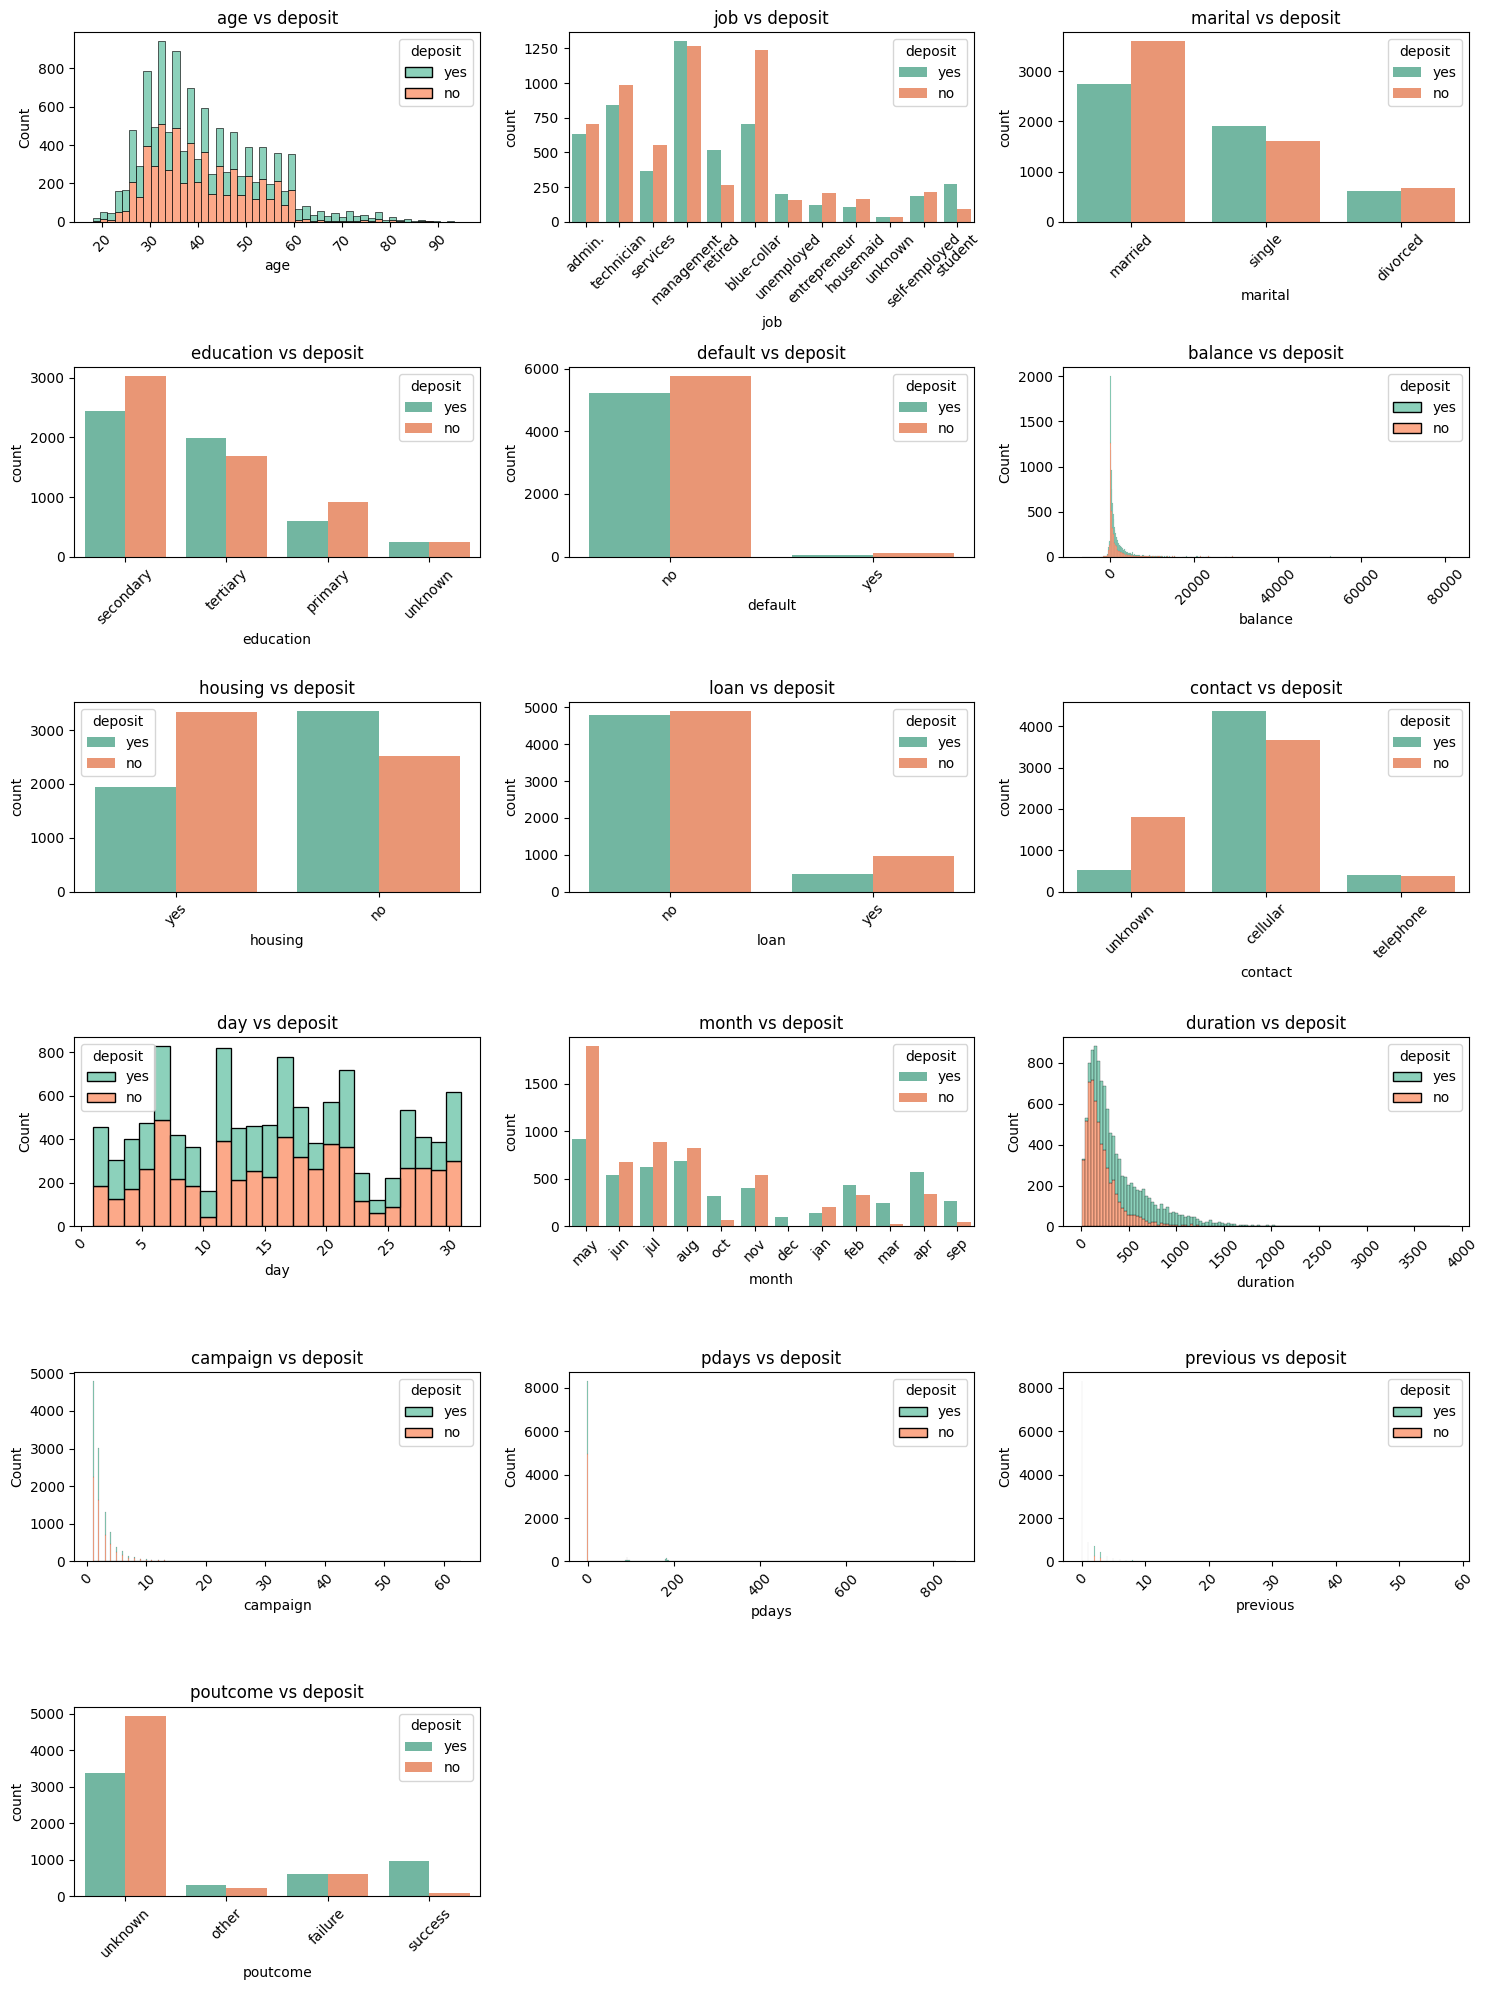

In [546]:
# Set the figure size
plt.figure(figsize=(15, 20))

# Define the color palette
palette = 'Set2'

# List of columns to plot against 'deposit'
columns_to_plot =Bank.columns.drop('deposit')

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 3, i)  # Adjust grid layout if needed
    if Bank[column].dtype == 'object':  # Categorical data
        sns.countplot(x=column, hue='deposit', data=Bank, palette=palette)
    else:  # Numerical data
        # Ensure hue is specified in histplot and palette is applied correctly
        sns.histplot(data=Bank, x=column, hue='deposit', multiple="stack", palette=palette, kde=False)
    
    plt.title(f'{column} vs deposit')
    plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



##### Intepretation
---
- *Education Level and Subscription Rates: Subscription rates are higher among clients with secondary and tertiary education levels than among those with only elementary education or an unknown education level. This may indicate that higher education levels correlate with greater financial awareness or ability to invest.*
- *Distribution Shape: Both distributions of `duration` are positively skewed, meaning most interactions are short, with a few longer ones.*
 - *Continuous Attributes Insight: Among the continuous attributes analyzed, `duration` stands out as a significant factor influencing deposit subscription rates. This attribute (likely representing the length of interaction during the campaign or call) shows a clear impact on whether clients subscribe, unlike other continuous variables where trends are less pronounced.*
 ---

##### Distrubtion of Target Variables `Deposit`

In [547]:
# Count the values for each category in the 'deposit' column
deposit_counts = Bank['deposit'].value_counts()

# Display the counts
print(deposit_counts)

# Display the percentage for each category as well
deposit_percentage = Bank['deposit'].value_counts(normalize=True) * 100
print(round(deposit_percentage,3))

deposit
no     5873
yes    5289
Name: count, dtype: int64
deposit
no     52.616
yes    47.384
Name: proportion, dtype: float64


#### Targeted Variables:`deposit`

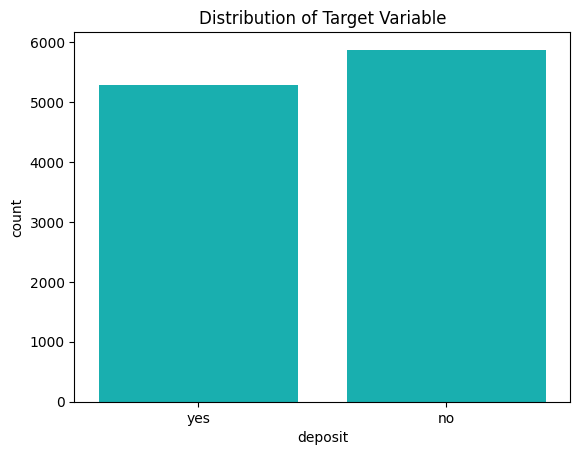

In [548]:
sns.countplot(data=Bank, x='deposit',color='#00C8C8')
plt.title('Distribution of Target Variable')
plt.show()


#### Key Observations:
---

- Class Slightly inpropotional: The plot clearly demonstrates a Slightly inpropotional. The "no" category (indicating no deposit) has a much higher count ` 5873`  which is  compared to ` 5289`the "yes" category is .

- Potential Challenges: This  Slightly inpropotional during model training and evaluation. The Models might be  slitly or not biased towards the majority class,Which may led  to inaccurate predictions for the minority class.
---

### *Use box plots to check for outliers:*

### Key Observation:
- Based on the summary statistics provided above, all variables generally fall within appropriate ranges when compared to real-world expectations. However, the `balance` column exhibits noticeable variations that may require further investigation and analysis. This indicates that while other factors appear consistent, the distribution of `balance` might include anomalies or outliers that warrant closer scrutiny to ensure data quality and reliability.


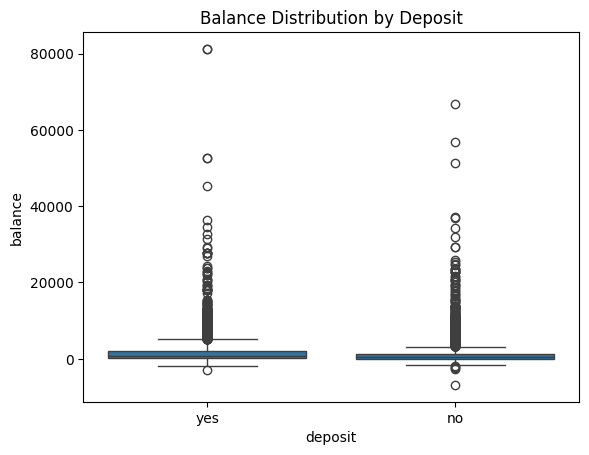

In [549]:
sns.boxplot(data=Bank, x='deposit', y='balance')
plt.title('Balance Distribution by Deposit')
plt.show()


#### Key Observations:
---

- Distribution: Both distributions are positively skewed, with a long tail towards higher balances. This indicates that most customers have lower balances, while a few have significantly higher balances.

- Median: The median balance for the `"yes" `category (deposit) seems slightly higher than the `"no" `category. However, due to the overlap and the presence of outliers, this difference might not be statistically significant.

---

##### *key observation*
---
- *Since we 've identified 1,055 outliers in the balance variable, it's important to decide on an effective strategy for dealing with them, especially given that your analysis involves a Decision Tree model.*   
- But for now lets keep them since:  *Decision Trees are relatively `robust to outliers` because they split data based on feature thresholds, rather than being influenced by the magnitude of values (like distance-based algorithms).*

- *Decision Trees do not rely on distance-based metrics (like squared errors). Instead, they create splits based on whether data points fall above or below certain thresholds.* 
- *However, outliers can still affect the performance of your Decision Tree model by potentially leading to overfitting.*
---




### *Correlation Analysis*

<Figure size 1200x800 with 0 Axes>

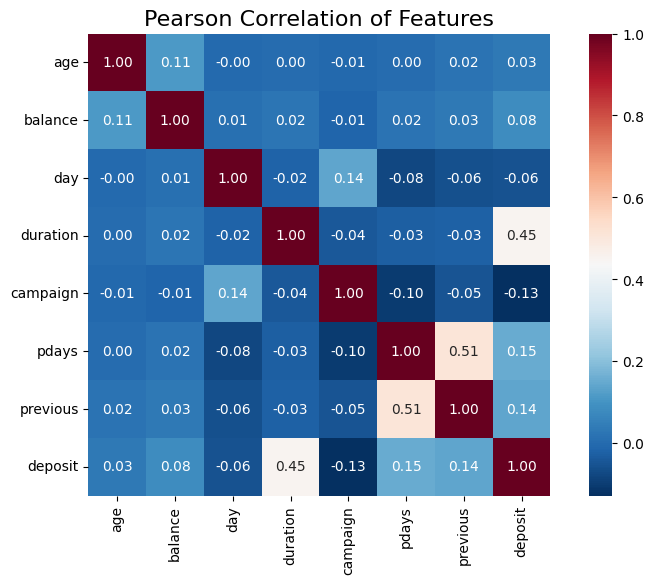

In [550]:
from sklearn.preprocessing import LabelEncoder

fig = plt.figure(figsize=(12,8))
Bank['deposit'] = LabelEncoder().fit_transform(Bank['deposit'])

# Separate numeric columns
numeric_Bank = Bank.select_dtypes(exclude="object")

# Calculate correlation matrix
corr_numeric = numeric_Bank.corr()

# Plot heatmap with annotations for correlation coefficients
fig = plt.figure(figsize=(10, 6))
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", annot=True, fmt=".2f", square=True)
plt.title("Pearson Correlation of Features", fontsize=16)
plt.show()

##### *`Intrepation`*
---
 **Duration and Deposit (0.45) - `Moderate Positive Correlation`:**
- The positive correlation between `duration` and `deposit` suggests that longer interactions (likely phone calls or customer engagement periods) are associated with a higher likelihood of a deposit being made. This is intuitive because customers who spend more time interacting with the company might be more engaged and ready to make a deposit.

**Campaign and Deposit (-0.13) - `Weak Negative Correlation`:**
- More contacts during marketing campaigns are slightly associated with a lower chance of deposit, though the relationship is weak.

 **Previous and Deposit (0.14) - `Weak Positive Correlation`:**
- A weak positive correlation suggests that customers who have previously made deposits are slightly more likely to make a deposit again. This makes sense as it indicates a propensity for repeat behavior, which is common in many customer-driven scenarios.
   
 **Pdays and Deposit (0.15) - `Weak Positive Correlation`:**
- The positive but weak correlation between `pdays` (the number of days since the last contact) and deposit suggests that recent contacts may slightly increase the chance of a deposit. This implies that more recent engagements are somewhat linked to deposits, though the relationship is not stron

 *Overall Insights:*

#####  *Strongest Correlations: Duration  is the strongest correlates with deposit. These could be excellent features to include in any predictive models, as it  provide useful signals about customer behavior and likelihood to deposit.*
   ---

### *`Let's Get Started with Building the Decision Tree Classifier`*


### *Data Preprocessing*

In [551]:
# Check for unique values in the target column ('deposit')
print('Unique values in the target column (deposit):')
print(Bank['deposit'].value_counts())

Unique values in the target column (deposit):
deposit
0    5873
1    5289
Name: count, dtype: int64


#### *Spliting the data in `features` and `Target`*

In [552]:
# Features (X) and Target (y)
X = Bank.drop('deposit', axis=1)  # Features (all columns except 'deposit')
y = Bank['deposit']              # Target (the 'deposit' column)


In [553]:
print(X.shape)
print(y.shape)

(11162, 16)
(11162,)


### *Splitting the dataset into training and testing sets*

- using a randomized train-test split. Your test set should be 20% of your total data. And don't forget to set a random_state for reproducibility.

In [554]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42) # Test size =0.2(len(df)) and 80% is for t

In [555]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 8929
X_test: 2233


#### *Explanation:*

---

- *In machine learning, the data is divided into `features (X)` and the `target variable (y)` to define what we are trying to predict based on other information.*

- **Training Set**: *This subset is used to train the model, allowing it to learn patterns from the data.*

- **Testing Set**: *This subset is kept separate to evaluate the model’s performance on unseen data, ensuring its predictions generalize well.*

- *This approach prevents overfitting and helps us gauge the model’s effectiveness.*

---

In [556]:
# Further split the training data into training and validation sets (80% training, 20% validation)X
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2 ,random_state=42) 

In [557]:
print(f"x_train of X_train: {len(X_train)}")
print(f"x_val: {len(X_val)}")

x_train of X_train: 7143
x_val: 1786


### *`Model Building`*

##### *Base Line Model*

##### *Now lets start by Base Line Model which is  used to predict:how well you'd do if your model always predicted the `majority class (the class with the most samples).`*

In [558]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.53


#####  Interpreation 
- This means that if your model were to always predict the majority class (whichever class has 53% of the samples), it would achieve an accuracy of 53%.

` Why This is Useful???`

- *The baseline accuracy acts as a benchmark to see if your model is actually learning something beyond just guessing the majority class.*

### *Let's Starting with a Simple Model:*


In [559]:
# Build Model
model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': retired           1
technician        2
housemaid         3
blue-collar       4
management        5
unknown           6
self-employed     7
admin.            8
student           9
services         10
entrepreneur     11
unemployed       12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                          'data_type': dtype('O'),
                                          'mapping': cellular     1
unknown      2
telephone    3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
nov     2
apr     3
sep     4
jan     5
mar     6
jul     7
jun     8
oct     9
aug    10
feb    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': failure    1
success    2
other      3
unknown    4
NaN       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [560]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(X_train)
acc_train = accuracy_score(y_train,y_predict)  
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.78


### *Model Performance Evaluation*

---

**`Training Accuracy: 1.0`**

- *This means that the model is perfectly fitting the training data, correctly predicting all the examples in the training set. In other words, the model is performing exceptionally well on the data it has already seen.*
  
- *However, if the training accuracy is **1.0 (100%)**, it might also indicate that the model is **overfitting**. Overfitting occurs when the model learns the training data too well, capturing noise and minor details that do not generalize well to new data. This can be problematic, as it reduces the model's ability to perform accurately on unseen data.*

---

**`Validation Accuracy: 0.78`**

- *This means that when the model was tested on validation data (data it hasn’t seen before), it achieved **78% accuracy**.*

- *Validation accuracy is often more significant because it measures how well the model will perform on **new, unseen data**. A validation accuracy of **78%** suggests that while the model performs well, there's a noticeable drop from the training accuracy of **100%**. This difference between training and validation accuracy is a sign of overfitting.*

---

#### `Lets check the depth of the tree during traning`

- *Use the get_depth method on the DecisionTreeClassifier in your model to see `how deep `your tree grew during training.*

In [561]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth() 
print("Tree Depth:", tree_depth)

Tree Depth: 24


### *Hyperparameter Tuning*

In [562]:
depth_hyperparams = range(1,30,2)
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model pipeline with specified depth
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )

    # Fit model to trainwing data
    test_model.fit(X_train, y_train)
    
    # Calculate and store training accuracy
    training_acc.append(accuracy_score(y_train, test_model.predict(X_train)))
    
    # Calculate and store validation accuracy
    validation_acc.append(test_model.score(X_val, y_val))

# Display the first three scores as an example
print("Training Accuracy Scores:", training_acc[:2])
print("Validation Accuracy Scores:", validation_acc[:2])

Training Accuracy Scores: [0.7111857762844743, 0.7747445051098978]
Validation Accuracy Scores: [0.7284434490481523, 0.761478163493841]


### *Evaluate*

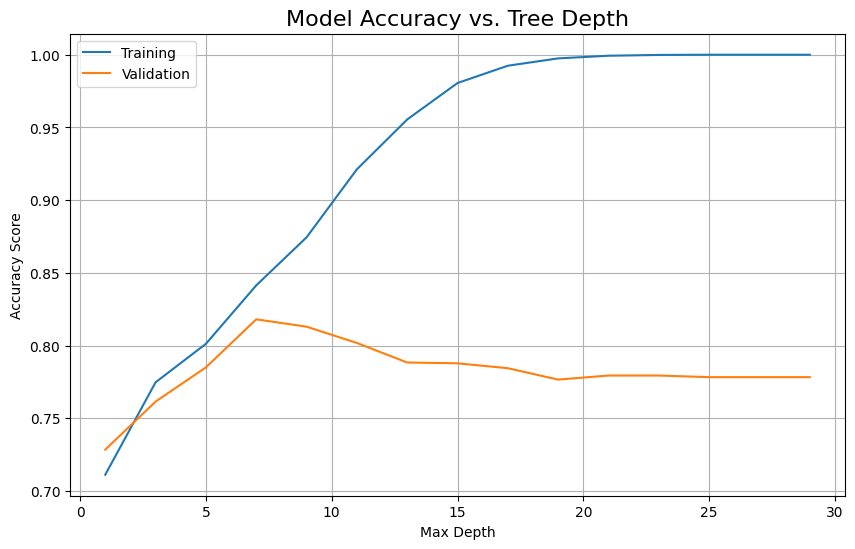

In [563]:
# Plot `depth_hyperparams`, `training_acc`
plt.figure(figsize=(10, 6))

plt.plot(depth_hyperparams, training_acc, label="Training")
plt.plot(depth_hyperparams, validation_acc, label="Validation")
# Add grid lines for better readability

plt.grid(True)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")  # Changed 'y.label' to 'plt.ylabel'
plt.legend()  # Changed 'plt.label()' to 'plt.legend()'
plt.title("Model Accuracy vs. Tree Depth", fontsize=16)
plt.show()

In [564]:
# Build Model
model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(max_depth=4,random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': retired           1
technician        2
housemaid         3
blue-collar       4
management        5
unknown           6
self-employed     7
admin.            8
student           9
services         10
entrepreneur     11
unemployed       12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                          'mapping': cellular     1
unknown      2
telephone    3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
nov     2
apr     3
sep     4
jan     5
mar     6
jul     7
jun     8
oct     9
aug    10
feb    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': failure    1
success    2
other      3
unknown    4
NaN       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [565]:
y_predict=model.predict(X_train)
acc_train = accuracy_score(y_train,y_predict)  # acc_train = accuracy_score(y_train,model.predict(X_tarin))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.79
Validation Accuracy: 0.79


### *Test of the model*

In [566]:
# Predict on the test set
y_pred_test = model.predict(X_test)
# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7725


#### *confusion matrix*

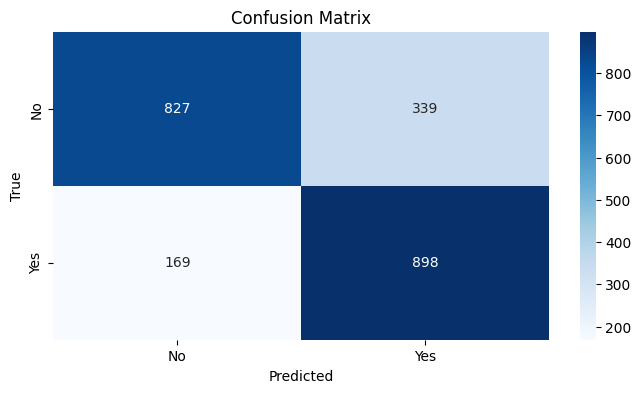

In [567]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Interpretation of the Confusion matrix
---
- True Negative (TN) = 827: The model correctly predicted 827 instances as the negative class ("No").
- False Positive (FP) = 339: The model incorrectly predicted 339 instances as the positive class ("Yes"), when they were actually negative ("No").
- False Negative (FN) = 169: The model incorrectly predicted 169 instances as the negative class ("No"), when they were actually positive ("Yes").
- True Positive (TP) = 898: The model correctly predicted 898instances as the positive class ("Yes").

---

In [568]:
# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1166
           1       0.73      0.84      0.78      1067

    accuracy                           0.77      2233
   macro avg       0.78      0.78      0.77      2233
weighted avg       0.78      0.77      0.77      2233




---
**Interpretation of the Classification Report:**

*For Class 0 ("No"):*
- *Precision = 0.83*: When the model predicts "No," it's correct *83%* of the time.
- *Recall = 0.71*: The model correctly identifies *71%* of all actual "No" instances.
- *F1-Score = 0.77*: The harmonic mean of precision and recall is *80%*, indicating a balanced performance for the "No" class.

*For Class 1 ("Yes"):*
- *Precision = 0.73*: When the model predicts "Yes," it's correct *73%* of the time.
- *Recall = 0.84*: The model correctly identifies *79%* of all actual "Yes" instances.
- *F1-Score = 0.78*: The F1-score for "Yes" is *78%*, showing a balanced performance similar to class "No."

**Overall Performance:**
- *Accuracy = 0.77*: The model is correct *77%* of the time across all predictions.
- *Macro Average = 0.78*: This is the average performance across both classes, giving equal weight to each class's metrics.
- *Weighted Average = 0.78*: This takes into account the number of instances in each class and gives the overall performance score, which is *79%*.

--- 


### *Communication*

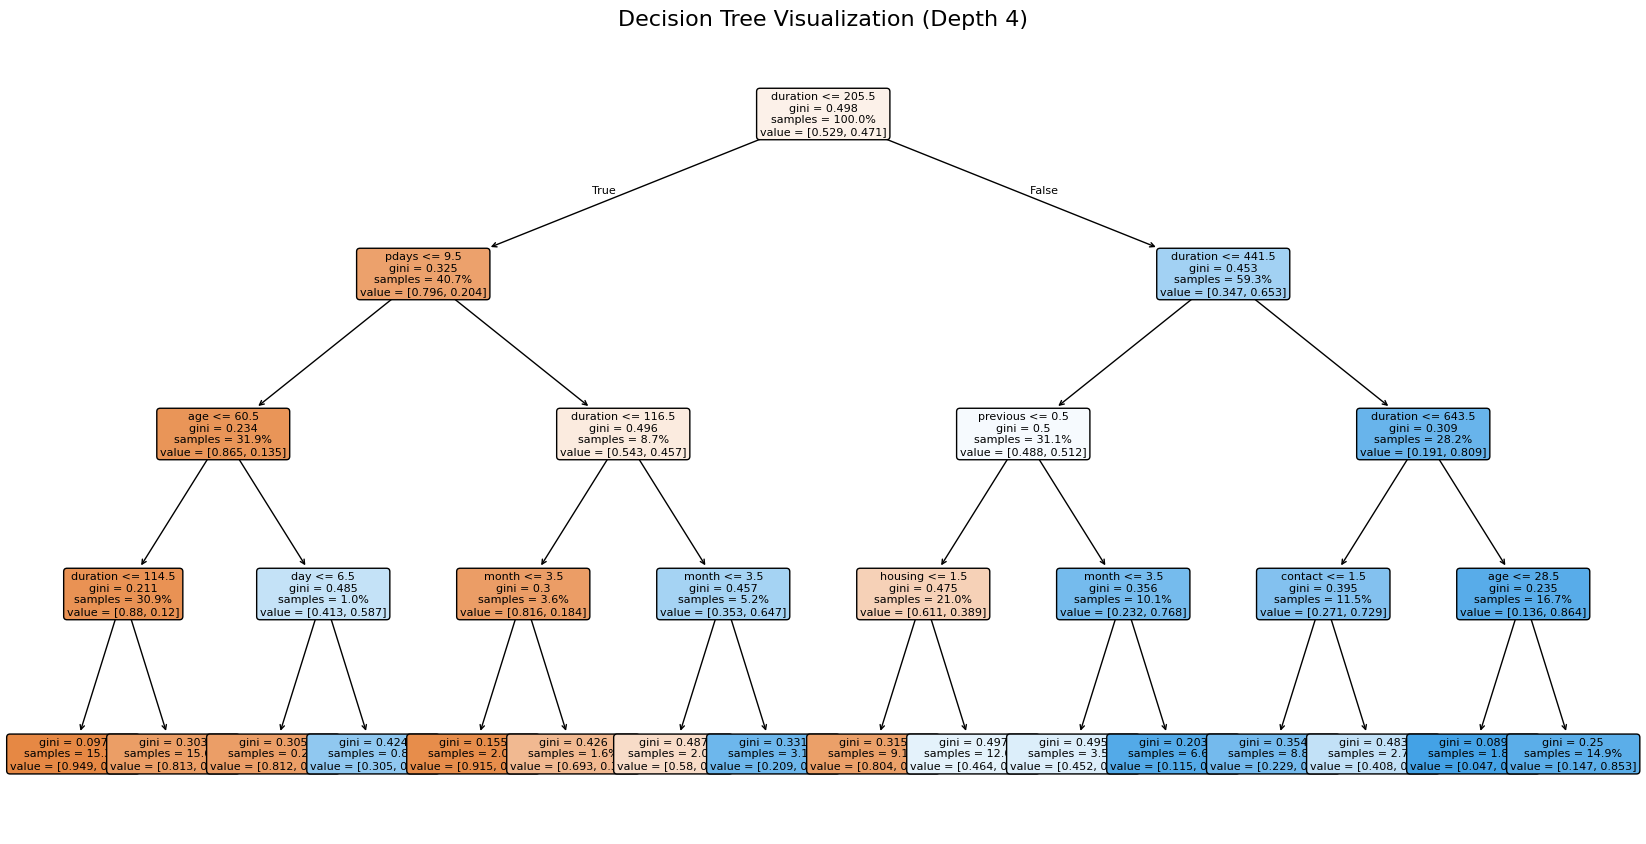

In [569]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(20, 10))

# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=4,  # Only display first 4 levels
    fontsize=8,  # Enlarge font
    ax=ax  # Place in figure axis
)

# Set the title for the plot
ax.set_title("Decision Tree Visualization (Depth 4)", fontsize=16)

# Adjust layout to add some spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()


### *Decision Tree Model Interpretation*

---

*The decision tree classifier is a **transparent and interpretable model** that breaks down the decision-making process into a series of binary decisions based on the features of the data. Below is a detailed description of how the decision tree works and the insights we can draw from it.*

##### *Root Node:*
*The **root node** of the tree represents the entire dataset and contains the most important feature for making the initial decision. In this case, the root node splits the data based on the **duration** feature. The **`duration`** of the call is a significant factor in predicting whether a customer subscribes to a term deposit or not:*
- *If the **duration** of the call is **less than or equal to 205.5 seconds**, the left branch is followed.*
- *If the **duration** is **greater than 205.5 seconds**, the right branch is followed.*

##### *Left Branch (Duration ≤ 205.5 seconds):*
*The **left branch** corresponds to calls with a duration of 205.5 seconds or less. Here, we can see that **pdays** (days since the last contact) is the next most important feature for further splitting:*
- *If **pdays** is **less than or equal to 9.5**, the left branch is taken.*
- *If **pdays** is greater than 9.5, the right branch is taken.*

*As we continue down the tree, other features like **age**, **duration**, and **housing** are used to split the data further, leading to different **leaf nodes**. These leaf nodes show the final class probabilities (whether a customer subscribes to a deposit or not). In general, shorter calls combined with recent contact with the client (pdays ≤ 9.5) are more likely to result in a subscription to a term deposit.*

##### *Right Branch (Duration > 205.5 seconds):*
*The **right branch** corresponds to calls longer than 205.5 seconds. The decision tree splits the data based on **duration** again:*
- *If the **duration** is less than or equal to 441.5 seconds, the left branch is followed.*
- *If the **duration** is greater than 441.5 seconds, the right branch is followed.*

*This branch also makes decisions based on **previous** (number of contacts performed before this campaign) and **age**, among other features. Each of these decisions further refines the likelihood of the customer subscribing to a deposit.*

##### *Leaf Nodes:*
*The **leaf nodes** at the end of the branches represent the final decisions. Each leaf node provides the predicted class (whether the customer subscribes to a term deposit, "yes" or "no") and the **proportion** of samples in each class. The more intense the color, the stronger the proportion of one class (either "yes" or "no") in that node.*

- *For example, a leaf node where **"yes"** is dominant (indicating a subscription to a term deposit) will be colored more intensely with that class.*
- *The **class proportions** indicate the likelihood of each class occurring at that particular decision point.*

##### *Feature Importance:*
*The tree structure highlights the **importance of each feature** in making the final decision:*
- *Features like **duration** and **pdays** appear at the top levels, indicating they are the most important for predicting whether a customer will subscribe to a term deposit.*

##### *Depth of the Tree:*
*The **depth of the tree** indicates how complex the model is. A deeper tree can capture more intricate patterns in the data but might also be prone to **overfitting**. If the tree is too deep, it may become too specific to the training data, making it less generalizable to new data. The ideal depth is one that balances capturing enough complexity without overfitting.*

##### *Overall Interpretation:*
*The decision tree has learned the relationships between different features in the dataset. For instance, it suggests that:*
- *The **`duration of the call`** is a critical feature; customers who engage in longer conversations are more likely to subscribe to a term deposit.*
- ***Recent contact** with customers (as indicated by **pdays**) plays a crucial role. A short call combined with a recent contact is more likely to result in a subscription.*
- ***Age** and **previous** interactions also influence the decision but in more subtle ways that depend on the other features.*

*This model is interpretable, meaning we can visually trace the decisions it makes at each step based on the features in the dataset. The model's decisions align with common business insights—such as customers who show more interest (longer call duration or more recent contact) are more likely to subscribe to a deposit.*

---

### *Important features*

In [570]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:5])
print("Importances:", importances[:5])

Features: Index(['age', 'job', 'marital', 'education', 'default'], dtype='object')
Importances: [0.02376388 0.         0.         0.         0.        ]


In [571]:
feature_important = pd.Series(importances, index=features).sort_values(ascending=False)
feature_important

duration     0.688840
previous     0.098089
pdays        0.070973
housing      0.059909
month        0.047310
age          0.023764
contact      0.006577
day          0.004538
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
loan         0.000000
campaign     0.000000
poutcome     0.000000
dtype: float64

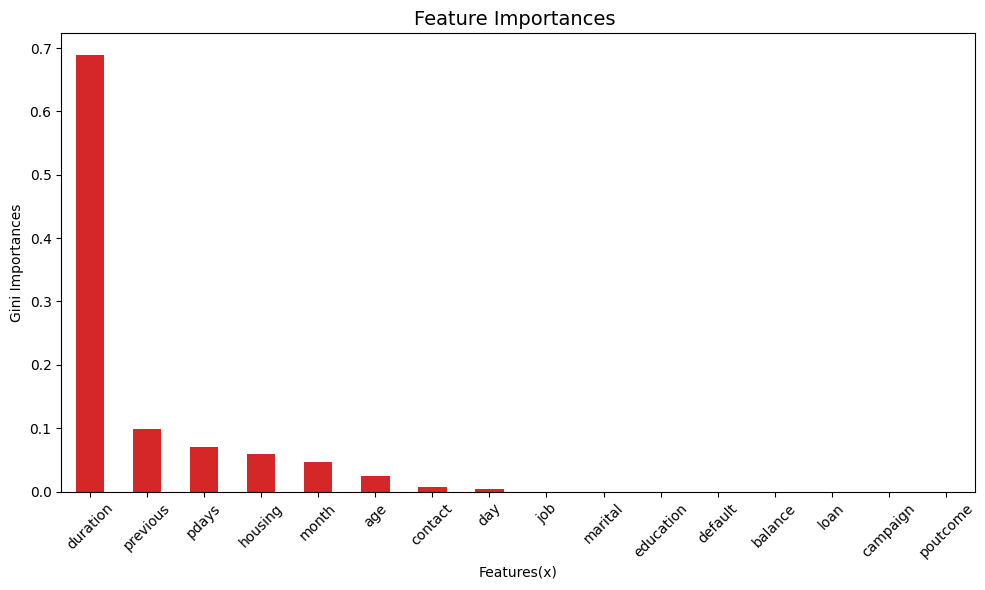

In [572]:
# Plot a vertical bar chart
plt.figure(figsize=(10, 6))
feature_important.plot(kind="bar",color="#d62728") 
plt.xlabel("Features(x)")
plt.ylabel("Gini Importances")
plt.title("Feature Importances ", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

#### *`Interpretation`*

- *The output shows the **feature importances** for a machine learning model, where `feature_important` is a sorted pandas Series representing how much each feature (variable) contributes to the predictions made by the model. In this context:*

  - *Higher values indicate more importance: Features with higher importance values are more influential in making accurate predictions.*
  - *Lower values indicate less importance: Features with a value of `0.000000` contribute minimally or not at all to the model, suggesting they may be less relevant or even redundant for prediction purposes.*

- *`duration` (0.6888400) and `previous` (0.098089) have the highest importance, meaning they are the most influential features for the model's predictions.*

- *Features like `duration_status`, `job`, `marital`, and others with an importance of `0.000000` contribute very little and might be considered for removal if you're looking to simplify the model.*

- *Mid-level features like `month`, `contact`, and `age` have moderate importance, so they play some role but not as much as the top features.*

#### *`Recommendation`*

- *`Call duration` and `previous` campaign outcomes are strong indicators of deposit success, so prioritize outreach to individuals who respond positively to longer engagements, particularly with high-balance individuals. These interactions are likely to lead to successful deposit subscriptions.*